# Mount Notebook to Google Drive
Upload the data, pretrianed model, figures, etc to your Google Drive, then mount this notebook to Google Drive. After that, you can access the resources freely.

This is the data folder that I have loaded in the root of My Drive in google drive (I could not make a git repo bc my files are too large to upload on the web): https://drive.google.com/drive/folders/1MeYIgcFoMJQdR3UomOOUhlA9hp9poLBf?usp=sharing

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Introduction


In [ ]:
# code comment is used as inline annotations for your coding

**Background of the problem**

  * what type of problem: We are predicting sepsis, which occurs when chemicals released in the bloodstream to fight an infection trigger inflammation throughout the body.

  * what is the importance/meaning of solving the problem:  Sepsis can cause a cascade of changes that damage multiple organ systems, leading them to fail, sometimes even resulting in death, which is why it is so important to predict its onset and catch it as early as possible to prevent any damage to the body.

  * what is the difficulty of the problem: Diagnosis is a difficult task when doctors have so much on their plates to crunch numbers on and look out for, and we have overwhelming amounts of population and personal patient data that is hard for the doctor to consume all at once.

  * the state of the art methods and effectiveness:

      1. Machine Learning Techniques:
        * These models leverage various patient data types, such as vital signs, laboratory results, and clinical notes, to identify complex patterns indicative of sepsis onset.
        * Deep learning models like RNNs and CNNs, in particular, have shown promising results in capturing temporal dependencies in patient data and detecting subtle signs of sepsis.

      2. Early Warning Systems (EWS):

        * EWSs continuously monitor patient data streams, including vital signs, laboratory values, and clinical observations, to detect early signs of deterioration, including sepsis.
        * These systems have been successful in triggering timely alerts to healthcare providers, enabling early intervention and improving patient outcomes.
        * EWSs are widely used in clinical settings to support proactive management of high-risk patients and reduce the incidence of sepsis-related complications.

      3. Clinical Decision Support Systems (CDSS):

        * CDSSs integrate patient-specific data with clinical guidelines and evidence-based knowledge to assist healthcare providers in diagnosing and managing sepsis.
        * These systems provide real-time recommendations, alerts, and decision support tools to aid clinicians in identifying sepsis early and guiding appropriate treatment.
        * CDSSs have been shown to improve clinical decision-making, reduce diagnostic errors, and enhance patient safety in sepsis management.


**Paper explanation**
  * what did the paper propose: The paper aims to implement an ensemble learning approach for early diagnosis of sepsis using neural networks, specifically Recurrent Neural Networks (RNNs), trained on patient-specific data. It utilizes temporally-associated clinical measurements, demographic data, and ICU admission/discharge times to predict the onset of sepsis. Leveraging the ensemble's capability to combine diverse patient-specific models, the method seeks to enhance generalization and prediction accuracy.

  * what is the innovations of the method: The method innovates by improving prediction accuracy through ensemble learning while addressing the challenges of privacy preservation in medical data.

  * how well the proposed method work (in its own metrics): According to the paper's metrics, the proposed method achieved significant improvements in prediction accuracy compared to traditional models, particularly in terms of AUROC.

  * what is the contribution to the research regime (referring the Background above, how important the paper is to the problem): Overall, the paper's contributions are significant as it offers a novel approach to sepsis prediction that balances accuracy and privacy concerns, addressing a critical need in the field of medical data analysis.

# Scope of Reproducibility:

The paper proposes that an ensemble approach to composing our model using patient-specific models would be more effective, and that creating an entire full model trained on the entirety of the data would yield a poor performing model. I will be reproducing this full model to present my capability to re-execute the logic of this paper, which has been aided by the paper's github repo listed further below in this notebook. The logic applied to training, validating, and assessing the accuracy of this sample model operates the same as with every other model that is established in this paper's experiment, and has been aided by the paper's git repo.

The data is very large, and there are a lot of patients to generate patient-specific models for. This experiment also requires a beefy GPU in order to quickly execute everything. For the purpose of this draft, I will reproduce a subsection of the experiment to assess and test all functions of the experiment without performing it for every single instance, since I do not have the computing power or available time to execute everything for this draft.


# Methodology


In [3]:
# import  packages you need
import numpy as np
import pandas as pd
from google.colab import drive


##  Data

**DATASETS**

The data (partitioned tsv files) is sourced from the paper's git repo code, and is processed into the appropriate data format, split, and distribution using the repo code as well.

Each partition file contains tab-seperated values (tsv) with the first line
containing the name of each column. Clinical measurements are z-scored.

The four partitions of the dataset were constructed such that the ratio of
sepsis and non-sepsis patients stays similar. The following table lists
distribution of hospital stay times and sepsis onset in hours for sepsis and
non-sepsis patients across the four partitions

**CODE SETUP AND DATA PROCESSING**

In [2]:
!git clone https://github.com/statnlp/sepens
!wget https://www.cl.uni-heidelberg.de/statnlpgroup/sepsisexp/SepsisExp.tar.gz
!tar zxvf SepsisExp.tar.gz

Cloning into 'sepens'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 53 (delta 21), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (53/53), 37.24 KiB | 1.38 MiB/s, done.
Resolving deltas: 100% (21/21), done.
--2024-04-15 00:53:50--  https://www.cl.uni-heidelberg.de/statnlpgroup/sepsisexp/SepsisExp.tar.gz
Resolving www.cl.uni-heidelberg.de (www.cl.uni-heidelberg.de)... 147.142.207.78
Connecting to www.cl.uni-heidelberg.de (www.cl.uni-heidelberg.de)|147.142.207.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26373703 (25M) [application/x-gzip]
Saving to: ‘SepsisExp.tar.gz’

SepsisExp.tar.gz    100%[===================>]  25.15M  14.7MB/s    in 1.7s    

2024-04-15 00:53:53 (14.7 MB/s) - ‘SepsisExp.tar.gz’ saved [26373703/26373703]

README
sepsisexp_timeseries_partition-A.tsv
sepsisexp_timeseries_partition-B.tsv
sepsisexp_timeseries_partition-C.ts

In [5]:
!cp "/content/drive/My Drive/DL4H_Project/grow_ensemble_perrone.py" "/content/sepens/grow_ensemble_perrone.py"
!cp "/content/drive/My Drive/DL4H_Project/inference_fullmodel.sh" "/content/sepens/inference_fullmodel.sh"
!cp "/content/drive/My Drive/DL4H_Project/inference_poolmodels.sh" "/content/sepens/inference_poolmodels.sh"
!cp "/content/drive/My Drive/DL4H_Project/make_data.sh" "/content/sepens/make_data.sh"
!cp "/content/drive/My Drive/DL4H_Project/make_fullmodel.sh" "/content/sepens/make_fullmodel.sh"
!cp "/content/drive/My Drive/DL4H_Project/make_models_perpat.sh" "/content/sepens/make_models_perpat.sh"
!cp "/content/drive/My Drive/DL4H_Project/dev_ids.py" "/content/sepens/dev_ids.py"
!cp "/content/drive/My Drive/DL4H_Project/calc_auroc.py" "/content/sepens/calc_auroc.py"
!cp "/content/drive/My Drive/DL4H_Project/data_labels.zip" "/content/data_labels.zip"
!cp "/content/drive/My Drive/DL4H_Project/models.zip" "/content/models.zip"
!cp "/content/drive/My Drive/DL4H_Project/12315/test_ids.dat" "/content/test_ids.dat"

In [6]:
!unzip data_labels.zip

Archive:  data_labels.zip
   creating: data/
   creating: data/data_13611/
  inflating: data/data_13611/test.dat  
  inflating: data/data_13611/train.dat  
  inflating: data/data_13611/dev.dat  
  inflating: data/data_13611/generated.dat  
  inflating: data/data_13611/label_pred.dat  
   creating: data/data_12302/
  inflating: data/data_12302/test.dat  
  inflating: data/data_12302/train.dat  
  inflating: data/data_12302/dev.dat  
  inflating: data/data_12302/generated.dat  
  inflating: data/data_12302/label_pred.dat  
   creating: data/data_13203/
  inflating: data/data_13203/test.dat  
  inflating: data/data_13203/train.dat  
  inflating: data/data_13203/dev.dat  
  inflating: data/data_13203/generated.dat  
  inflating: data/data_13203/label_pred.dat  
   creating: data/data_12066/
  inflating: data/data_12066/test.dat  
  inflating: data/data_12066/train.dat  
  inflating: data/data_12066/dev.dat  
  inflating: data/data_12066/generated.dat  
  inflating: data/data_12066/label_pr

In [40]:
!rm -r data/data_12315

In [41]:
!mkdir data/data_12315
!cp "/content/drive/My Drive/DL4H_Project/12315/dev.dat" "/content/data/data_12315/dev.dat"
!cp "/content/drive/My Drive/DL4H_Project/12315/test.dat" "/content/data/data_12315/test.dat"
!cp "/content/drive/My Drive/DL4H_Project/12315/train.dat" "/content/data/data_12315/train.dat"
!cp "/content/drive/My Drive/DL4H_Project/12315/generated.dat" "/content/data/data_12315/generated.dat"
!cp "/content/drive/My Drive/DL4H_Project/12315/label_pred_all.dat" "/content/data/data_12315/label_pred_all.dat"

In [42]:
!cp "/content/drive/My Drive/DL4H_Project/model_all_mixed.pt" "/content/model_all_mixed.pt"

In [5]:
!chmod +x sepens/make_data.sh
!./sepens/make_data.sh 0

INFO: Data files exist, generating train/dev/test splits...
12290 12296 12298 12334 12342 12349 12350 12351 13914 12361 12364 12376 12377 12383 12415 12426 12429 12434 12438 12439 12441 12454 12462 12480 12496 12500 12508 12512 12556 12559 12593 12598 12599 12601 12606 12609 12613 12621 12624 12626 12627 12631 12643 12644 12657 12677 12683 12686 12687 12695 12696 12697 12706 12710 12726 12729 12769 12770 12771 12776 12784 12787 12801 12815 12816 12826 14038 12836 12863 12867 12868 12888 12894 12902 12911 12923 12925 12940 12964 12984 12987 12990 12998 13004 13008 13030 13032 13055 13059 13062 13063 13071 13076 13077 13078 13080 13088 13092 13103 13118 13120 13123 13124 13136 13872 13145 13147 13148 13153 13161 13162 13192 13197 13200 13206 13213 13240 13255 13266 13267 13271 13282 13300 13822 13302 13321 13326 13343 13344 13357 13367 13384 13387 13409 13412 13416 13420 13421 13429 13452 13457 13461 13470 13471 13480 13481 13504 13514 13532 13543 13554 13567 11532 13582 13588 13589 1359

In [54]:
!cp "/content/drive/My Drive/DL4H_Project/12315/test_ids.dat" "/content/test_ids.dat"

In [55]:
drive.flush_and_unmount()

In [9]:
dfA = pd.read_csv('/content/sepsisexp_timeseries_partition-A.tsv', sep='\t')
dfB = pd.read_csv('/content/sepsisexp_timeseries_partition-B.tsv', sep='\t')
dfC = pd.read_csv('/content/sepsisexp_timeseries_partition-C.tsv', sep='\t')
dfD = pd.read_csv('/content/sepsisexp_timeseries_partition-D.tsv', sep='\t')

**STATISTICS**

In [11]:
dfA.describe()

,id,sepsis,severity,timestep,respiratory_minute_volume,heart_rate,leukocytes,temperature,partial_co2,respiratory_rate,...,calcium,potassium,mixed_venous_oxygen_saturation,urine_output,net balance,alanine_transaminase,aspartate_transaminase,stroke_volume,svri,age
count,156704.000000,156704.000000,156704.000000,156704.000000,156704.000000,156704.000000,156704.000000,156704.000000,156704.000000,156704.000000,...,156704.000000,156704.000000,156704.000000,156704.000000,156704.000000,156704.000000,156704.000000,156704.000000,156704.000000,156704.000000
mean,12626.643883,0.606692,1.198712,415.394856,-0.158946,-0.109885,-0.063523,-0.050760,-0.276307,-0.364692,...,0.175648,-0.167095,0.000869,-0.224993,-0.207837,-0.121425,-0.183973,0.291898,0.007869,-0.154681
std,716.262248,0.488486,1.445370,483.193528,1.116563,0.984716,0.841941,0.960839,0.717635,1.230160,...,0.897623,0.841964,0.862454,0.823038,0.681110,0.735095,0.656804,0.843005,0.751659,0.957553
min,11460.000000,0.000000,0.000000,0.000000,-3.033777,-4.288378,-1.777270,-8.067903,-2.812496,-3.427722,...,-8.814428,-5.424779,-4.470184,-0.710447,-7.821855,-0.580261,-0.602295,-2.784903,-2.799802,-3.278467
25%,12066.000000,0.000000,0.000000,83.500000,-0.606959,-0.887358,-0.622171,-0.732387,-0.778690,-1.202032,...,-0.272186,-0.741863,-0.457935,-0.710447,-0.388886,-0.458547,-0.466809,-0.120807,-0.433654,-0.671671
50%,12453.000000,1.000000,1.000000,232.000000,-0.241275,-0.207154,-0.219299,-0.168117,-0.365887,-0.345998,...,0.125127,-0.334653,0.010733,-0.471113,-0.296802,-0.328138,-0.348260,0.317126,0.061715,-0.092383
75%,13201.000000,1.000000,3.000000,565.500000,0.390363,0.521636,0.338181,0.509008,0.137530,0.338830,...,0.522441,0.276162,0.502262,-0.112112,-0.174891,-0.134699,-0.212774,0.463104,0.119831,0.602762
max,14121.000000,1.000000,4.000000,2681.000000,3.615038,4.942962,6.003663,5.926004,6.571205,6.331072,...,6.680801,11.474441,3.268542,19.234050,45.390747,7.757192,7.374421,6.119746,7.882457,1.877196


<Axes: >

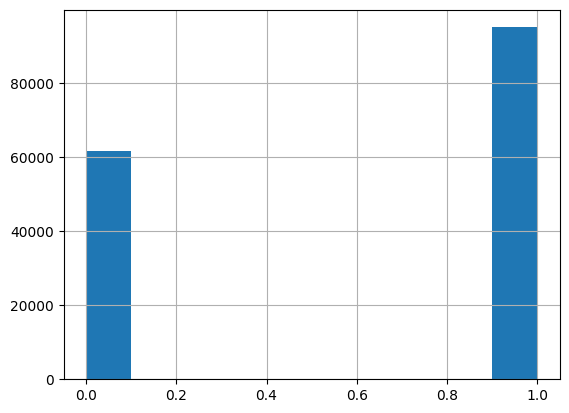

In [10]:
dfA['sepsis'].hist()

In [12]:
dfB.describe()

,id,sepsis,severity,timestep,respiratory_minute_volume,heart_rate,leukocytes,temperature,partial_co2,respiratory_rate,...,calcium,potassium,mixed_venous_oxygen_saturation,urine_output,net balance,alanine_transaminase,aspartate_transaminase,stroke_volume,svri,age
count,152155.000000,152155.000000,152155.000000,152155.000000,152155.000000,152155.000000,152155.000000,152155.000000,152155.000000,152155.000000,...,152155.000000,152155.000000,152155.000000,152155.000000,152155.000000,152155.000000,152155.000000,152155.000000,152155.000000,152155.000000
mean,12751.745759,0.609457,1.157865,354.319861,-0.142263,-0.151747,-0.067130,-0.093149,-0.325195,-0.374515,...,0.123167,-0.124148,0.022403,-0.217953,-0.230481,-0.118508,-0.198054,0.245663,0.035740,-0.095683
std,664.828728,0.487874,1.431631,411.282286,1.075488,0.936373,0.758070,0.936915,0.691380,1.214097,...,0.816280,0.849435,0.940544,1.111260,0.646759,0.769267,0.675779,0.729394,0.772984,0.958775
min,11592.000000,0.000000,0.000000,0.000000,-3.033777,-4.288378,-1.856060,-8.067903,-3.205162,-3.427722,...,-8.516443,-5.831989,-4.333013,-0.710447,-12.442112,-0.580261,-0.593827,-2.638925,-2.799802,-2.930894
25%,12134.000000,0.000000,0.000000,80.000000,-0.573715,-0.838772,-0.613252,-0.619533,-0.778690,-1.202032,...,-0.272186,-0.741863,-0.332195,-0.710447,-0.394726,-0.458547,-0.483745,-0.084313,-0.322957,-0.729600
50%,12712.000000,1.000000,1.000000,218.500000,-0.241275,-0.255740,-0.228219,-0.168117,-0.375956,-0.345998,...,0.125127,-0.131048,0.010733,-0.511002,-0.298448,-0.310750,-0.373663,0.317126,0.061715,-0.034455
75%,13303.000000,1.000000,2.000000,470.000000,0.490095,0.473050,0.323315,0.509008,0.036847,0.510037,...,0.621769,0.276162,0.513693,-0.112112,-0.192939,-0.136872,-0.195838,0.353621,0.161343,0.660691
max,14112.000000,1.000000,4.000000,2711.500000,3.615038,8.101052,6.910497,5.587442,6.571205,6.331072,...,8.369384,11.678045,3.382851,25.217400,49.055088,7.791967,7.780877,6.156241,8.214548,1.819267


<Axes: >

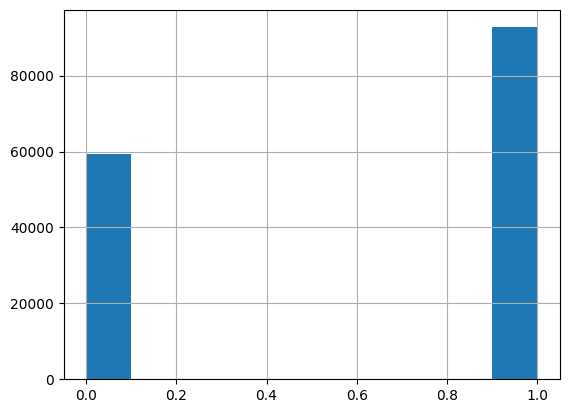

In [15]:
dfB['sepsis'].hist()

In [13]:
dfC.describe()

,id,sepsis,severity,timestep,respiratory_minute_volume,heart_rate,leukocytes,temperature,partial_co2,respiratory_rate,...,calcium,potassium,mixed_venous_oxygen_saturation,urine_output,net balance,alanine_transaminase,aspartate_transaminase,stroke_volume,svri,age
count,156219.000000,156219.000000,156219.000000,156219.000000,156219.000000,156219.000000,156219.000000,156219.000000,156219.000000,156219.000000,...,156219.000000,156219.000000,156219.000000,156219.000000,156219.000000,156219.000000,156219.000000,156219.000000,156219.000000,156219.000000
mean,12741.062246,0.616058,1.158035,382.138479,-0.128631,-0.151473,-0.137621,-0.021244,-0.246200,-0.316600,...,0.013900,-0.210548,0.100002,-0.235784,-0.216051,-0.174571,-0.240118,0.299815,0.047426,-0.236825
std,708.385192,0.486346,1.414577,421.363367,1.138337,0.948112,0.888950,0.898086,0.760564,1.167692,...,0.793936,0.860856,0.867214,0.998143,0.765389,0.567831,0.502251,0.857396,0.824010,0.912855
min,11532.000000,0.000000,0.000000,0.000000,-3.033777,-4.288378,-1.856060,-8.067903,-3.205162,-3.427722,...,-8.814428,-4.610359,-4.504477,-0.710447,-10.243506,-0.580261,-0.610763,-2.602431,-2.661430,-3.104681
25%,12124.000000,0.000000,0.000000,83.000000,-0.673448,-0.838772,-0.706908,-0.619533,-0.718280,-1.030825,...,-0.470843,-0.741863,-0.206455,-0.710447,-0.390899,-0.441159,-0.475277,-0.157302,-0.309120,-0.729600
50%,12667.000000,1.000000,1.000000,230.000000,-0.241275,-0.255740,-0.304036,-0.055263,-0.345751,-0.345998,...,0.025799,-0.334653,0.010733,-0.511002,-0.298075,-0.302056,-0.348260,0.317126,0.061715,-0.324099
75%,13289.000000,1.000000,2.000000,519.500000,0.556583,0.424464,0.237091,0.509008,0.067052,0.338830,...,0.423112,0.276162,0.559416,-0.152001,-0.178016,-0.145566,-0.204306,0.536093,0.175180,0.428976
max,14102.000000,1.000000,4.000000,2296.500000,3.615038,5.477408,6.772242,4.346047,5.765737,6.502279,...,6.184159,11.474441,3.382851,24.419619,66.317320,7.965845,7.340549,6.192735,8.173037,1.703409


<Axes: >

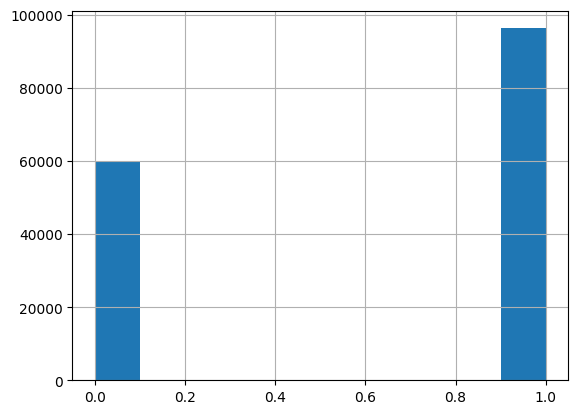

In [16]:
dfC['sepsis'].hist()

In [14]:
dfD.describe()

,id,sepsis,severity,timestep,respiratory_minute_volume,heart_rate,leukocytes,temperature,partial_co2,respiratory_rate,...,calcium,potassium,mixed_venous_oxygen_saturation,urine_output,net balance,alanine_transaminase,aspartate_transaminase,stroke_volume,svri,age
count,137490.000000,137490.000000,137490.000000,137490.000000,137490.000000,137490.000000,137490.000000,137490.000000,137490.000000,137490.000000,...,137490.000000,137490.000000,137490.000000,137490.000000,137490.000000,137490.000000,137490.000000,137490.000000,137490.000000,137490.000000
mean,12852.889345,0.586966,0.935828,319.439992,-0.195352,-0.180507,-0.102669,-0.117326,-0.275255,-0.412174,...,0.110224,-0.190922,0.090658,-0.325901,-0.225114,-0.191505,-0.233558,0.160021,0.089300,-0.050404
std,719.356643,0.492381,1.319636,384.923354,1.136083,0.968268,0.757675,0.822204,0.769154,1.250094,...,0.838264,0.824173,0.888521,0.649753,0.594715,0.700565,0.708388,0.799510,0.743047,0.951279
min,11596.000000,0.000000,0.000000,0.000000,-3.033777,-4.288378,-1.723752,-8.067903,-3.275640,-3.427722,...,-8.913756,-6.035595,-4.321583,-0.710447,-8.777770,-0.580261,-0.593827,-2.821397,-2.772127,-2.872965
25%,12232.000000,0.000000,0.000000,70.000000,-0.606959,-0.935944,-0.660823,-0.619533,-0.768621,-1.373239,...,-0.371515,-0.741863,-0.217886,-0.710447,-0.379473,-0.475934,-0.492213,-0.266785,-0.253771,-0.382027
50%,12878.500000,1.000000,0.000000,189.000000,-0.341007,-0.304326,-0.216326,-0.168117,-0.375956,-0.345998,...,0.125127,-0.334653,0.010733,-0.511002,-0.295235,-0.354220,-0.382131,0.317126,0.061715,0.139332
75%,13516.000000,1.000000,2.000000,413.000000,0.390363,0.424464,0.239693,0.396154,0.067052,0.338830,...,0.522441,0.276162,0.582278,-0.231779,-0.194415,-0.223811,-0.272049,0.317126,0.175180,0.544833
max,14082.000000,1.000000,4.000000,2423.000000,3.615038,7.372262,6.107726,4.233193,6.470522,6.502279,...,8.071399,11.881651,3.405713,15.644041,54.790580,7.870212,7.476035,5.973768,8.117688,1.819267


<Axes: >

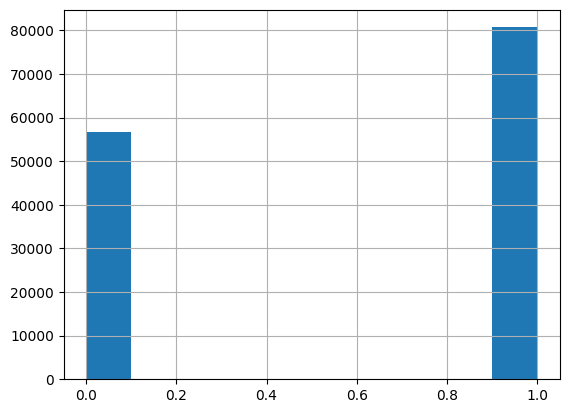

In [17]:
dfD['sepsis'].hist()

**TRAINING/VAL SPLIT**

In [46]:
!wc -l train.dat

308859 train.dat


In [47]:
!wc -l test.dat

137490 test.dat


In [48]:
137490 / (308859 + 137490)

0.3080325037134619

We have an approximate 70/30 training-validation split

##   Model

**MODEL ARCHITECTURE**

It is defined in model_ts.py, a module provided by the paper's repo, that will be visualized below for viewing. The model is not pre-trained, it is trained from scratch off the data we load. The model is trained and validated in main_ts.py, which will be visualized below as well.

2 layers, 200 hidden units per layer

Input Layer:

* Linear layer mapping input features to a specified size.

Recurrent Neural Network (RNN) Layer:

* LSTM: Long-Short Term Memory model.
* Applies dropout for regularization.

Fully Connected (FC) Layer:

* Linear layer mapping RNN output to a single output neuron.

Dropout Layer:

* Applied before input layer and after RNN layer.

Weight Initialization:

* Weights are initialized uniformly, biases are initialized to zero.

Forward Pass:

* Input passes through layers sequentially, reshaping before FC layer.

Hidden State Initialization:

* Initial hidden state is set based on the RNN type.

model_ts.py:

```
import torch.nn as nn

class RNNModelTS(nn.Module):
    """Container module with an encoder (inp), a recurrent module, and a decoder (fc)."""

    def __init__(self, rnn_type, nfeat, ninp, nhid, nlayers, dropout=0.5):
        super(RNNModelTS, self).__init__()
        self.drop = nn.Dropout(dropout)
        self.inp = nn.Linear(nfeat, ninp)
        if rnn_type in ['LSTM', 'GRU']:
            self.rnn = getattr(nn, rnn_type)(ninp, nhid, nlayers, dropout=dropout)
        else:
            try:
                nonlinearity = {'RNN_TANH': 'tanh', 'RNN_RELU': 'relu'}[rnn_type]
            except KeyError:
                raise ValueError( """An invalid option for `--model` was supplied,
                                 options are ['LSTM', 'GRU', 'RNN_TANH' or 'RNN_RELU']""")
            self.rnn = nn.RNN(ninp, nhid, nlayers, nonlinearity=nonlinearity, dropout=dropout)
        self.fc = nn.Linear(nhid, 1)

        self.rnn_type = rnn_type
        self.nhid = nhid
        self.nlayers = nlayers

    def init_weights(self):
        initrange = 0.1
        self.inp.weight.data.uniform_(-initrange, initrange)
        self.fc.bias.data.zero_()
        self.fc.weight.data.uniform_(-initrange, initrange)

    def forward(self, input, hidden):

        emb = self.drop(self.inp(input))
        output, hidden = self.rnn(emb, hidden)
        output = self.drop(output)
        #
        decoded = self.fc(output.view(output.size(0)*output.size(1), output.size(2)))
        return decoded.view(output.size(0), output.size(1), decoded.size(1)), hidden

    def init_hidden(self, bsz):
        weight = next(self.parameters())
        if self.rnn_type == 'LSTM':
            return (weight.new_zeros(self.nlayers, bsz, self.nhid),
                    weight.new_zeros(self.nlayers, bsz, self.nhid))
        else:
            return weight.new_zeros(self.nlayers, bsz, self.nhid)
```



main_ts.py:



```
import argparse
import time
import math
import os
import torch
import torch.nn as nn
import torch.onnx
import data
import model_ts


parser = argparse.ArgumentParser(description='PyTorch SCIDATOS Time Series RNN/LSTM Model')
parser.add_argument('--data', type=str, default='.',
                    help='location of the data corpus')
parser.add_argument('--model', type=str, default='LSTM',
                    help='type of recurrent net (RNN_TANH, RNN_RELU, LSTM, GRU)')
parser.add_argument('--nfeatures', type=int, default=43,
                    help='number of input features (time series)')
parser.add_argument('--insize', type=int, default=200,
                    help='size of input for RNN')
parser.add_argument('--nhid', type=int, default=200,
                    help='number of hidden units per layer')
parser.add_argument('--nlayers', type=int, default=2,
                    help='number of layers')
parser.add_argument('--lr', type=float, default=20,
                    help='initial learning rate')
parser.add_argument('--clip', type=float, default=0.25,
                    help='gradient clipping')
parser.add_argument('--epochs', type=int, default=40,
                    help='upper epoch limit')
parser.add_argument('--min_epochs', type=int, default=10,
                    help='minimum epoch before early stopping')
parser.add_argument('--batch_size', type=int, default=20, metavar='N',
                    help='batch size')
parser.add_argument('--bptt', type=int, default=48,
                    help='sequence length')
parser.add_argument('--seqoverlap', type=float, default=0.5,
                    help='sequence overlap')
parser.add_argument('--dropout', type=float, default=0.2,
                    help='dropout applied to layers (0 = no dropout)')
parser.add_argument('--tied', action='store_true',
                    help='tie the word embedding and softmax weights')
parser.add_argument('--seed', type=int, default=1111,
                    help='random seed')
parser.add_argument('--cuda', action='store_true',
                    help='use CUDA')
parser.add_argument('--log-interval', type=int, default=100, metavar='N',
                    help='report interval')
parser.add_argument('--save', type=str, default='model.pt',
                    help='path to save the final model')
parser.add_argument('--onnx-export', type=str, default='',
                    help='path to export the final model in onnx format')
args = parser.parse_args()

# Set the random seed manually for reproducibility.
torch.manual_seed(args.seed)
if torch.cuda.is_available():
    if not args.cuda:
        print("WARNING: You have a CUDA device, so you should probably run with --cuda")

device = torch.device("cuda" if args.cuda else "cpu")

###############################################################################
# Load data
###############################################################################

# Load timeseries as torch tensor (cannot be modified)
#timeseries = data.TimeseriesTorch(args.data, args.nfeatures)

# Load timeseries as numpy array (not immutable)
timeseries = data.TimeseriesNumPy(args.data, args.nfeatures)
print("Timeseries loaded")

# Starting from sequential data, batchify arranges the dataset into columns.
# For instance, with the alphabet as the sequence and batch size 4, we'd get
# ┌ a g m s ┐
# │ b h n t │
# │ c i o u │
# │ d j p v │
# │ e k q w │
# └ f l r x ┘.
# These columns are treated as independent by the model, which means that the
# dependence of e. g. 'g' on 'f' can not be learned, but allows more efficient
# batch processing.

def batchify(rawdata, bsz):
    # Work out how cleanly we can divide the dataset into bsz parts.
    nbatch = rawdata[0].size(0) // bsz
    # Trim off any extra elements that wouldn't cleanly fit (remainders).
    data = rawdata[0].narrow(0, 0, nbatch * bsz)

    # Evenly divide the data across the bsz batches.
    data = data.view(-1, nbatch, args.nfeatures)
    data = data.permute(1,0,2).contiguous()

    ys = rawdata[1].narrow(0, 0, nbatch * bsz)
    ys = ys.view(-1, nbatch, 1)
    ys = ys.permute(1,0,2).contiguous()
    
    return [data.to(device),ys.to(device)]



# Generate overlapping sequences to avoid information loss by unfavorable
# sequence splits

def expand_and_batchify(rawdata, bsz, step=0.5):    
    
    seqlen = args.bptt
    rawlen = int(len(rawdata[0]))
    
    stepsize = int(seqlen*step)
    
    # calculate length of new sequence with overlapa
    timesteps = (math.floor((rawlen-seqlen)/stepsize)+1 ) * seqlen
    timesteps += rawlen - (math.floor((rawlen-seqlen)/stepsize)+1) * stepsize
    
    steps = torch.Tensor(timesteps, args.nfeatures)
    targets = torch.Tensor(timesteps)    # severity

    pos = 0
    for i in range(0, rawlen-seqlen+1, stepsize):
        for j in range(0,seqlen):
            steps[pos] = torch.from_numpy(rawdata[0][i + j])
            targets[pos] = float(rawdata[1][i + j])
            pos += 1
    # copy over remainders
    remainderstart = (math.floor((rawlen-seqlen)/stepsize)+1) * stepsize
    for k in range(remainderstart, rawlen):
        steps[pos] = torch.from_numpy(rawdata[0][k])
        targets[pos] = float(rawdata[1][k])
        pos += 1

    # make sure we have initialized every position
    assert(timesteps == pos)
    
    return batchify([steps,targets], bsz)




eval_batch_size = 10

train_data = expand_and_batchify(timeseries.train, args.batch_size)
val_data = expand_and_batchify(timeseries.valid, eval_batch_size)
test_data = expand_and_batchify(timeseries.test, eval_batch_size)


###############################################################################
# Build the model
###############################################################################

model = model_ts.RNNModelTS(args.model, args.nfeatures, args.insize,
                            args.nhid, args.nlayers, args.dropout).to(device)

criterion = nn.MSELoss()

###############################################################################
# Training code
###############################################################################

def repackage_hidden(h):
    """Wraps hidden states in new Tensors, to detach them from their history."""
    if isinstance(h, torch.Tensor):
        return h.detach()
    else:
        return tuple(repackage_hidden(v) for v in h)


# get_batch subdivides the source data into chunks of length args.bptt.
# If source is equal to the example output of the batchify function, with
# a bptt-limit of 2, we'd get the following two Variables for i = 0:
# ┌ a g m s ┐ ┌ b h n t ┐
# └ b h n t ┘ └ c i o u ┘
# Note that despite the name of the function, the subdivison of data is not
# done along the batch dimension (i.e. dimension 1), since that was handled
# by the batchify function. The chunks are along dimension 0, corresponding
# to the seq_len dimension in the LSTM.

def get_batch(source, i):

    seq_len = min(args.bptt, len(source[0]) - 1 - i)
    data = source[0][i:i+seq_len]

    target = source[1][i:i+seq_len]

    return data, target

def flatten(mydata):
    return mydata.permute(1,0,2).contiguous().view(-1,1)

def evaluate(data_source):
    # Turn on evaluation mode which disables dropout.
    model.eval()
    total_loss = 0.

    hidden = model.init_hidden(eval_batch_size)
    with torch.no_grad():
        for i in range(0, data_source[0].size(0) - 1, args.bptt):

            data, targets = get_batch(data_source, i)
            output, hidden = model(data, hidden)
            
            total_loss += len(data) * criterion(output, targets).item()
            hidden = repackage_hidden(hidden)

    return total_loss / (len(data_source[0]) - 1)


def train():
    # Turn on training mode which enables dropout.
    model.train()
    total_loss = 0.
    total_xentropy = 0.
    start_time = time.time()
    
    hidden = model.init_hidden(args.batch_size)
    for batch, i in enumerate(range(0, train_data[0].size(0) - 1, args.bptt)):
        data, targets = get_batch(train_data, i)

        hidden = repackage_hidden(hidden)
        model.zero_grad()
        output, hidden = model(data, hidden)
        
        loss = criterion(output, targets)

        loss.backward()

        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        torch.nn.utils.clip_grad_norm_(model.parameters(), args.clip)
        for p in model.parameters():
            p.data.add_(-lr, p.grad.data)

        total_loss += loss.item()

        if batch % args.log_interval == 0 and batch > 0:
            cur_loss = total_loss / args.log_interval
            cur_xentropy = total_xentropy / args.log_interval
            elapsed = time.time() - start_time
            print('| epoch {:3d} | {:5d}/{:5d} batches | lr {:02.2f} | ms/batch {:5.2f} | '
                    'loss {:5.2f} | mse {:8.5f}'.format(
                epoch, batch, len(train_data[0]) // args.bptt, lr,
                elapsed * 1000 / args.log_interval, cur_loss, cur_loss))
            total_loss = 0
            start_time = time.time()


def export_onnx(path, batch_size, seq_len):
    print('The model is also exported in ONNX format at {}'.
          format(os.path.realpath(args.onnx_export)))
    model.eval()
    dummy_input = torch.LongTensor(seq_len * batch_size).zero_().view(-1, batch_size).to(device)
    hidden = model.init_hidden(batch_size)
    torch.onnx.export(model, (dummy_input, hidden), path)


# Loop over epochs.
lr = args.lr
best_val_loss = None

# At any point you can hit Ctrl + C to break out of training early.
try:
    for epoch in range(1, args.epochs+1):
        epoch_start_time = time.time()
        train()
        val_loss = evaluate(val_data)
        print('-' * 89)
        print('| end of epoch {:3d} | time: {:5.2f}s | valid loss {:5.2f} | '
                'valid mse {:8.5f}'.format(epoch, (time.time() - epoch_start_time),
                                           val_loss, val_loss))
        print('-' * 89)
        # Save the model if the validation loss is the best we've seen so far.
        if epoch >= args.min_epochs and (not best_val_loss or val_loss < best_val_loss):
            with open(args.save, 'wb') as f:
                torch.save(model, f)
            best_val_loss = val_loss
        else:
            # Anneal the learning rate if no improvement has been seen in the validation dataset.
            lr /= 4.0

except KeyboardInterrupt:
    print('-' * 89)
    print('Exiting from training early')

# Load the best saved model.
with open(args.save, 'rb') as f:
    model = torch.load(f)
    # after load the rnn params are not a continuous chunk of memory
    # this makes them a continuous chunk, and will speed up forward pass
    model.rnn.flatten_parameters()

# Run on test data.
test_loss = evaluate(test_data)
print('=' * 89)
print('| End of training | test loss {:5.2f} | test mse {:8.5f}'.format(
    test_loss, test_loss))
print('=' * 89)

if len(args.onnx_export) > 0:
    # Export the model in ONNX format.
    export_onnx(args.onnx_export, batch_size=1, seq_len=args.bptt)
```



**TRAINING OBJECTIVES**

Loss: MSELoss()

Optimizer: torch.nn.utils.clip_grad_norm_()

**MODEL TRAINING AND TEST**

Execution takes too long, so I have pre-trained the model for this reproduction experiment and will load it in to test run for a section of the data.

In [ ]:
# Not executing because it takes too long to run, but these commands build and train all of the models
#!chmod +x sepens/make_fullmodel.sh
#!./sepens/make_fullmodel.sh

#!chmod +x sepens/make_models_perpat.sh
#!./sepens/make_models_perpat.sh

In [49]:
!unzip models.zip

Archive:  models.zip
  inflating: models/model_12065.pt   
  inflating: models/model_12160.pt   
  inflating: models/model_12997.pt   
  inflating: models/model_12302.pt   
  inflating: models/model_11987.pt   
  inflating: models/model_13203.pt   
  inflating: models/model_13661.pt   
  inflating: models/model_12128.pt   
  inflating: models/model_12329.pt   
  inflating: models/model_12453.pt   
  inflating: models/model_12167.pt   
  inflating: models/model_11460.pt   
  inflating: models/model_13803.pt   
  inflating: models/model_12497.pt   
  inflating: models/model_12567.pt   
  inflating: models/model_13425.pt   
  inflating: models/model_12493.pt   
  inflating: models/model_11965.pt   
  inflating: models/model_11592.pt   
  inflating: models/model_13047.pt   
  inflating: models/model_13669.pt   
  inflating: models/model_12908.pt   
  inflating: models/model_11924.pt   
  inflating: models/model_12135.pt   
  inflating: models/model_12716.pt   
  inflating: models/model_125

In [50]:
!mv "/content/model_all_mixed.pt" "/content/models/model_all_mixed.pt"

In [56]:
!chmod +x sepens/inference_fullmodel.sh
!./sepens/inference_fullmodel.sh

EncNum 12315
| Generated 0/137490 timesteps
| Generated 100/137490 timesteps
| Generated 200/137490 timesteps
| Generated 300/137490 timesteps
| Generated 400/137490 timesteps
| Generated 500/137490 timesteps
| Generated 600/137490 timesteps
| Generated 700/137490 timesteps
| Generated 800/137490 timesteps
| Generated 900/137490 timesteps
| Generated 1000/137490 timesteps
| Generated 1100/137490 timesteps
| Generated 1200/137490 timesteps
| Generated 1300/137490 timesteps
| Generated 1400/137490 timesteps
| Generated 1500/137490 timesteps
| Generated 1600/137490 timesteps
| Generated 1700/137490 timesteps
| Generated 1800/137490 timesteps
| Generated 1900/137490 timesteps
| Generated 2000/137490 timesteps
| Generated 2100/137490 timesteps
| Generated 2200/137490 timesteps
| Generated 2300/137490 timesteps
| Generated 2400/137490 timesteps
| Generated 2500/137490 timesteps
| Generated 2600/137490 timesteps
| Generated 2700/137490 timesteps
| Generated 2800/137490 timesteps
| Generated 2

# Results

The assessment of the model is provided by the git repo code as well, and gives us insight into the AUROC for the model at each interval of forecasting the sepsis ahead of time. Running the model on all of the data takes a while, so I will display the first two intervals of experimentation introduced in the paper, around the 4hr and 8hr marks of forecasting.

In [57]:
!python3 sepens/calc_auroc.py

Interval: -4.250000 to -3.750000
full model: 0.49999999999999983
Interval: -8.250000 to -7.750000
full model: 0.49999999999999983


## Model comparison

When the paper executed this portion of the experiment on the full model for the 4hr and 8hr time intervals, they achieved an AUROC of 70.80 and 69.48 respectively. We achieved an approximate score of 50 for both intervals, likely due to running on a smaller portion of data and for a shorter amount of time to train.

# Discussion



The paper is certainly reproducible, as I was able to execute all parts of it successfully. I think achieving the same accuracy and being able to test all portions of the experiment is just a matter of GPU power andd available time to run the GPU for, but other than that, this is quite reproducible.

It was a bit hard initially to figure out how to use the code repo, but luckily things are named well and organized into separate modules, so I eventually got comfortable with using and modifying the repo to get it to run in my own environment in colab.

I think it would help with reproducibility to provide an option to run all of these experiments using a CPU, that way it is more accessible to users looking to test (even if the tests take an extremely long time to complete).

In my next phase, I'll be modifying the loaded data and repo code more to implement my own experiments on ensemble size and the partition size splits of the data (A,B,C,D into 2-split and 6-split), as well as doing more development to get the whole experiment to run end-to-end on my machine.

In [ ]:
# no code is required for this section
'''
if you want to use an image outside this notebook for explanaition,
you can read and plot it here like the Scope of Reproducibility
'''

# References

1.   Schamoni, S., Hagmann, M., & Riezler, S. (2022). Ensembling Neural Networks for Improved Prediction and Privacy in Early Diagnosis of Sepsis. Proceedings of the 7th Machine Learning for Healthcare Conference, PMLR 182, 123-145. Retrieved from https://doi.org/10.48550/arXiv.2209.00439



```
@inproceedings{schamoni2022,
  author = {Schamoni, Shigehiko and Hagmann, Michael and Riezler, Stefan},
  title = {Ensembling Neural Networks for Improved Prediction and Privacy in Early Diagnosis of Sepsis},
  booktitle = {Proceedings of the 6th Machine Learning for Healthcare Conference},
  year = {2022},
  city = {Durham, NC},
  country = {USA},
  volume = {182},
  series = {Proceedings of Machine Learning Research},
  publisher = {PMLR},
  url = {https://www.cl.uni-heidelberg.de/~schamoni/publications/dl/MLHC2022_Ensembling.pdf}
}
```





# Feel free to add new sections